In [1]:
# Load saved model
import tensorflow as tf
model_directory = 'model'

loaded_model = tf.saved_model.load(model_directory)

In [2]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def load_image(image_path):
    image = tf.io.read_file(image_path)
    # Dynamically decode image based on its format
    if image_path.endswith('.jpg'):
        image = tf.image.decode_jpeg(image, channels=3)
    elif image_path.endswith('.png'):
        image = tf.image.decode_png(image, channels=3)
    image = tf.image.resize(image, [120, 120])  # Resize images
    image = tf.keras.applications.vgg16.preprocess_input(image) 
    return image

image_path = 'aug_data/test/images/90_aug_20.png'
preprocessed_image = load_image(image_path)
image_batch = tf.expand_dims(preprocessed_image, 0)  # Adds a batch dimension

# Use the loaded model for prediction
inference_function = loaded_model.signatures['serving_default']
predictions = inference_function(image_batch)

# Extract predictions (assuming your model outputs are named 'classification_output' and 'regression_output')
classification_pred = predictions['classification_output']
regression_pred = predictions['regression_output']

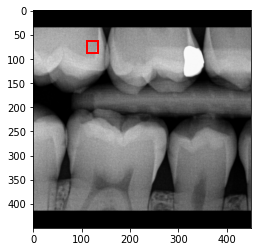

In [3]:

def visualize_predicted_image(image_path, coordinates):
    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    height, width, _ = image.shape

    # Prepare the plot
    fig, ax = plt.subplots(1)
    ax.imshow(image)

    x_min, y_min, x_max, y_max = coordinates
    
    # Denormalize the bounding box coordinates
    x_min_denorm = x_min * width
    y_min_denorm = y_min * height
    x_max_denorm = x_max * width
    y_max_denorm = y_max * height
    
    # Calculate width and height of the bounding box
    bbox_width = x_max_denorm - x_min_denorm
    bbox_height = y_max_denorm - y_min_denorm

    # Draw rectangle
    rect = patches.Rectangle((x_min_denorm, y_min_denorm), bbox_width, bbox_height, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

    plt.show()

# Make a prediction using the loaded model
inference_function = loaded_model.signatures['serving_default']
predictions = inference_function(tf.constant(image_batch, dtype=tf.float32))

# Extract and process predictions
classification_pred = predictions['classification_output'].numpy()
regression_pred = predictions['regression_output'].numpy()

# Visualization
coordinates = regression_pred[0]  # Adjust this if necessary based on your model output
visualize_predicted_image(image_path, coordinates)  # Ensure this function is defined as in your original code

In [ ]:
import tensorflow as tf
import cv2

model_directory = 'model'
loaded_model = tf.saved_model.load(model_directory)

def load_image(image_path):
    image = tf.io.read_file(image_path)
    if image_path.endswith('.jpg'):
        image = tf.image.decode_jpeg(image, channels=3)
    elif image_path.endswith('.png'):
        image = tf.image.decode_png(image, channels=3)
    image = tf.image.resize(image, [120, 120])
    image = tf.keras.applications.vgg16.preprocess_input(image)
    return image

image_path = 'aug_data/test/images/90_aug_20.png'
preprocessed_image = load_image(image_path)
image_batch = tf.expand_dims(preprocessed_image, 0)

inference_function = loaded_model.signatures['serving_default']
predictions = inference_function(image_batch)

def visualize_predicted_image_opencv(image_path, coordinates):
    # Load the image with OpenCV
    image = cv2.imread(image_path)
    
    # Convert image from BGR to RGB since OpenCV loads images in BGR
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Get image dimensions
    height, width, _ = image_rgb.shape

    # Denormalize coordinates
    x_min, y_min, x_max, y_max = coordinates
    x_min_denorm = int(x_min * width)
    y_min_denorm = int(y_min * height)
    x_max_denorm = int(x_max * width)
    y_max_denorm = int(y_max * height)

    # Draw bounding box
    cv2.rectangle(image_rgb, (x_min_denorm, y_min_denorm), (x_max_denorm, y_max_denorm), (255, 0, 0), 2)

    # Convert image back to BGR for displaying with OpenCV
    image_bgr = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)

    # Display the image with bounding box
    cv2.imshow("Predicted Image", image_bgr)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Use the model for prediction
predictions = inference_function(tf.constant(image_batch, dtype=tf.float32))

# Extract and process predictions
classification_pred = predictions['classification_output'].numpy()
regression_pred = predictions['regression_output'].numpy()

# Visualization
coordinates = regression_pred[0]
visualize_predicted_image_opencv(image_path, coordinates)
